<a href="https://colab.research.google.com/github/AkyLast/knn-classifier-evaluation/blob/main/knn_classifier_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import __all__
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

### Analise de Bibliotecas do Scikit-Learn para prática

In [2]:
datasets = [name for name in __all__ if not name.startswith("_")]

print("Datasets Dispoíveis:")

for dataset in datasets:
  print("-", dataset)

Datasets Dispoíveis:
- clear_data_home
- dump_svmlight_file
- fetch_20newsgroups
- fetch_20newsgroups_vectorized
- fetch_file
- fetch_lfw_pairs
- fetch_lfw_people
- fetch_olivetti_faces
- fetch_species_distributions
- fetch_california_housing
- fetch_covtype
- fetch_rcv1
- fetch_kddcup99
- fetch_openml
- get_data_home
- load_diabetes
- load_digits
- load_files
- load_iris
- load_breast_cancer
- load_linnerud
- load_sample_image
- load_sample_images
- load_svmlight_file
- load_svmlight_files
- load_wine
- make_biclusters
- make_blobs
- make_circles
- make_classification
- make_checkerboard
- make_friedman1
- make_friedman2
- make_friedman3
- make_gaussian_quantiles
- make_hastie_10_2
- make_low_rank_matrix
- make_moons
- make_multilabel_classification
- make_regression
- make_s_curve
- make_sparse_coded_signal
- make_sparse_spd_matrix
- make_sparse_uncorrelated
- make_spd_matrix
- make_swiss_roll


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns = data.feature_names)
df["Classification"] = data.target

# Analisando o Conjunto de dados e escolhendo o pré-processamento

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Classification
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [40]:
df["Classification"].value_counts()

,count
Classification,
1,357
0,212


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Análise da Correlação entre as colunas em si

In [8]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Classification
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


## Colunas com números de correlação baixa

- mean fractal dimension = 0.012838
- texture error = 0.008303
- smoothness error = 0.067016
- symmetry error = 0.006522
- fractal dimension error = -0.077972

Há uma possível chances que estas estejam atrapanhando o modelo.

In [9]:
X = df.drop("Classification", axis = 1)
y = df["Classification"]

X_notLigation = df.drop(["mean fractal dimension", "texture error", "smoothness error", "symmetry error", "fractal dimension error"], axis = 1)

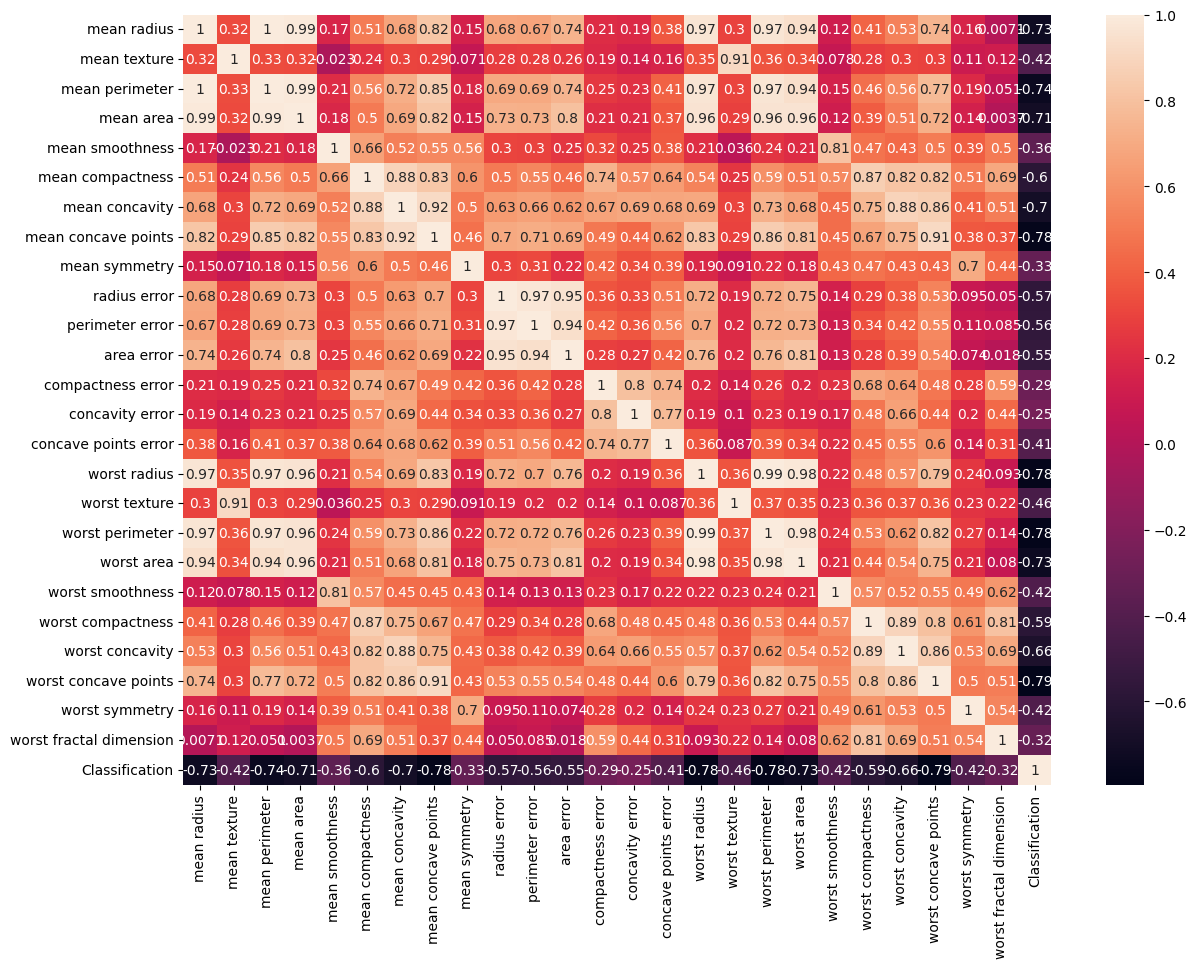

In [24]:
plt.figure(figsize = (14, 10))
sns.heatmap(X_notLigation.corr(), annot = True)
plt.show()

## Separando os datasets para o treinamento
Dividido em:
1. train e test puro, sem nenhuma modificação.
2. train e test escalonado, pré-processado
3. train e test sem colunas com baixa correlação, puro e sem escalonamento.
4.train test sem colunas com baixa correlação escalonada, pré-processada.


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_notLig, X_test_notLig, y_train_notLig, y_test_notLig = train_test_split(X_notLigation, y, test_size = 0.2, random_state = 42)

X_trainNotLig_scaled = scaler.fit_transform(X_train_notLig)
X_testNotLig_scaled = scaler.fit_transform(X_test_notLig)

#### Treinamento de modelo teste

In [48]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acc:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

Acc: 0.956140350877193

               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## Processamento de Analise de Hiperparâmetro e pré-processamento

In [26]:
param = list(range(1, 200, 4))

model_score_scaled = []
model_score_notLig_scaled = []
model_score_unscaled = []
model_score_notLig_unscaled = []

for k in param:
  model_unscaled = KNeighborsClassifier(n_neighbors = k)
  model_unscaled.fit(X_train, y_train)

  y_pred_unscaled = model_unscaled.predict(X_test)
  model_score_unscaled.append(accuracy_score(y_test, y_pred_unscaled))

  # -Uncorrelated
  model_notLig_unscaled = KNeighborsClassifier(n_neighbors = k)
  model_notLig_unscaled.fit(X_train_notLig, y_train_notLig)

  y_pred_notLig_unscaled = model_notLig_unscaled.predict(X_test_notLig)
  model_score_notLig_unscaled.append(accuracy_score(y_test_notLig, y_pred_notLig_unscaled))

  #pré-processamento
  model_scaled = KNeighborsClassifier(n_neighbors = k)
  model_scaled.fit(X_train_scaled, y_train)

  y_pred_scaled = model_scaled.predict(X_test_scaled)
  model_score_scaled.append(accuracy_score(y_test, y_pred_scaled))

  # -Uncorrelated
  model_notLig_scaled = KNeighborsClassifier(n_neighbors = k)
  model_notLig_scaled.fit(X_trainNotLig_scaled, y_train_notLig)

  y_pred_notLig_scaled = model_notLig_scaled.predict(X_testNotLig_scaled)
  model_score_notLig_scaled.append(accuracy_score(y_test_notLig, y_pred_notLig_scaled))

# Analise gráfica de desempenho do aprendizado

---



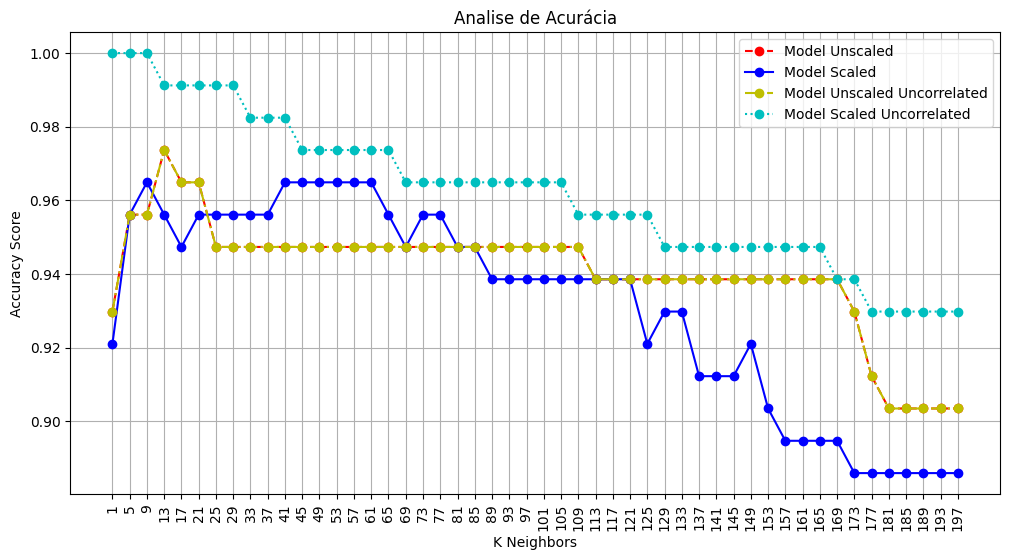

In [41]:
plt.figure(figsize = (12, 6))
plt.plot(param, model_score_unscaled, marker = "o", linestyle = "--", color = "r", label = "Model Unscaled")
plt.plot(param, model_score_scaled, marker = "o", linestyle = "-", color = "b", label = "Model Scaled")
plt.plot(param, model_score_notLig_unscaled, marker = "o", linestyle = "-.", color = "y", label = "Model Unscaled Uncorrelated")
plt.plot(param, model_score_notLig_scaled, marker = "o", linestyle = ":", color = "c", label = "Model Scaled Uncorrelated")
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Analise de Acurácia")
plt.legend()
plt.xticks(param, rotation = 90)
plt.grid(True)
plt.show()

## Treinamento do Modelo com o melhor hiperparâmetro e processamento analisado

In [46]:
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X_trainNotLig_scaled, y_train_notLig)

y_pred = model.predict(X_testNotLig_scaled)
accuracy = accuracy_score(y_test_notLig, y_pred) * 100
print(f"Acc: {accuracy:.2f}%")
print("\n",classification_report(y_test_notLig, y_pred))

Acc: 100.00%

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

